In [9]:
# import libraries
from music21 import *
from random import randint
from copy import deepcopy
import math
import matplotlib.pyplot as plt
import numpy as np

### Structure
Here is the generation of the sequence of transitions between the two emotions. The main idea is to come up with a sequence accelerating the transitions, in other words, the duration of each emotion will be shorter as the sequence continues. So we generate this sequence given the parts, their duration (number of measures), the maximum duration of one part and the wanted length of the result sequence.
Basically, at each step of the algorithm, the next duration is randomly chosen between the current maximal duration variable and the current maximal duration variable minus one (*maxDuration - 1* and *maxDuration*), splitting by a quarter. The algorithm runs until the number of desired measures is obtained.

*Note: the actual output sequence is note the one we used for out composition*

In [10]:
# return a random duration
def getDuration(maxDuration):
    integer = randint(max(maxDuration - 1, 0), maxDuration)
    frac = 0
    if integer != maxDuration or maxDuration == 0:
        frac = randint(0, 3) * 0.25
    return integer + frac

# check if other part have remaining measures
def existOther(nextp, nameOfParts, parts):
    rest = 0
    for part in parts:
        if part != nextp:
            rest += parts[part]
    return rest != 0

# return next part
def getNextPart(curr, numberOfParts, nameOfParts, parts):
    nextp = randint(0, numberOfParts - 1)
    while nextp == curr or parts[nameOfParts[nextp]] == 0:
        nextp = randint(0, numberOfParts - 1)
    return nextp

# generate full sequence 
def generateSequence(parts, maxDuration, total):
    # check arguments
    assert parts != None
    assert maxDuration != None
    assert total != None
    totalDuration = 0
    for part in parts:
        totalDuration += parts[part]
    assert totalDuration - 0.5 >= total
    # define usefull values
    nameOfParts = [name for name in parts]
    numberOfParts = len(nameOfParts)
    # current part (represented by array index)
    curr = randint(0, numberOfParts - 1)
    result = []
    count = 0
    i = 0
    duration = 0
    lastDuration = 0
    # generation
    while count < total:
        # determine the duration of the next measure(s)
        lastDuration = duration
        duration = getDuration(maxDuration)
        while duration == lastDuration or duration == 0:
            duration = getDuration(maxDuration)
        # check that there is enough reamaining measures for current part
        if duration < parts[nameOfParts[curr]]:
            # check if this is only last possibility
            if not existOther(curr, nameOfParts, parts):
                result.append((nameOfParts[curr], total - count))
                return result
            # add section to the result
            result.append((nameOfParts[curr], duration))
            # increment count
            count += duration
            # decrement remaining measures for current part
            parts[nameOfParts[curr]] -= duration
        # select next part
        curr = getNextPart(curr, numberOfParts, nameOfParts, parts)
        # update maxDuration every 3 cycles
        if i % 4 == 0 and maxDuration != 0:
            maxDuration -= 1
        i += 1
    return result

In [13]:
parts = {
    "A": 32,
    "B": 32,
}
maxDuration = 6
total = 60

sequence = generateSequence(parts, maxDuration, total)
for part in sequence:
    print(part)

('A', 6)
('B', 5)
('A', 4.0)
('B', 5)
('A', 4.75)
('B', 3.75)
('A', 3.25)
('B', 4)
('A', 3.5)
('B', 2.25)
('A', 3)
('B', 2.75)
('A', 2.25)
('B', 1.25)
('A', 2)
('B', 1.75)
('A', 1.5)
('B', 0.5)
('A', 0.25)
('B', 1)
('A', 0.25)
('B', 0.75)
('A', 0.5)
('B', 0.75)


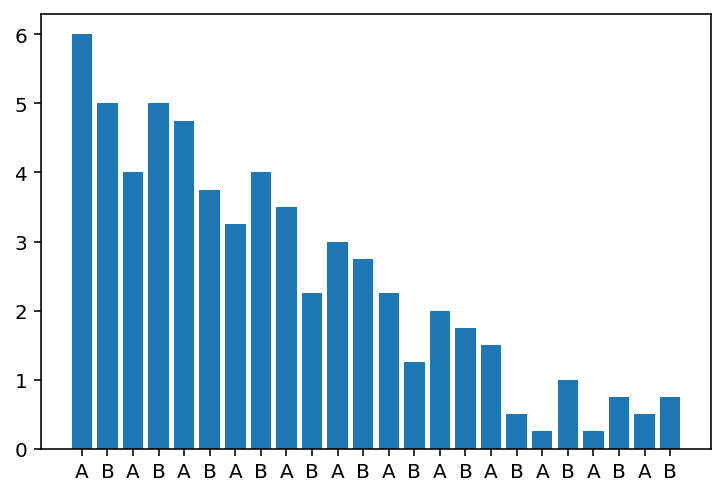

In [14]:
yplot = [part[1] for part in sequence]
xAxis = [part[0] for part in sequence]
xValue = np.arange(len(xAxis))
plt.bar(xValue, yplot)
plt.xticks(xValue, xAxis)
plt.show()

### Sequence of our piece
Here is the sequence we obtained and used in our project.

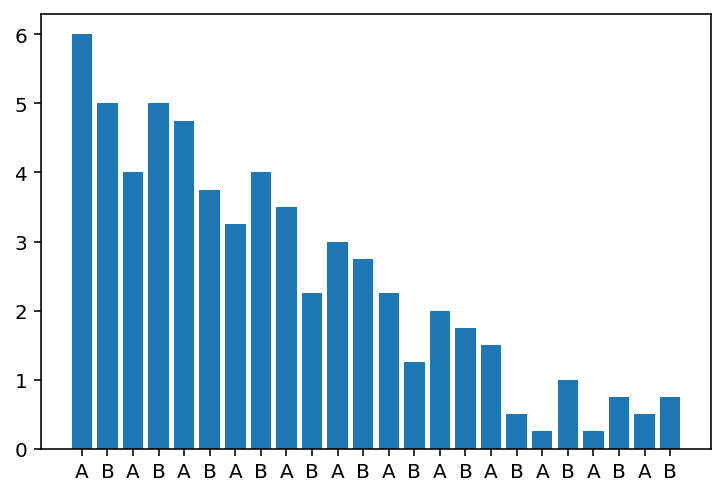

In [16]:
result = [
    ('A', 5.75),
    ('B', 5),
    ('A', 4.5),
    ('B', 5),
    ('A', 4.5),
    ('B', 4),
    ('A', 3.25),
    ('B', 4),
    ('A', 3.5),
    ('B', 3),
    ('A', 2),
    ('B', 3),
    ('A', 2.75),
    ('B', 2),
    ('A', 1.5),
    ('B', 2),
    ('A', 1),
    ('B', 0.25),
    ('A', 1),
    ('B', 0.75),
    ('A', 1),
    ('B', 0.25),
    ('A', 0.5),
    ('B', 0.75),
    ('A', 0.5),
    ('B', 0.25),
]

yplot = [part[1] for part in sequence]
xAxis = [part[0] for part in sequence]
xValue = np.arange(len(xAxis))
plt.bar(xValue, yplot)
plt.xticks(xValue, xAxis)
plt.show()